<a href="https://colab.research.google.com/github/roy-subhojeet/who-am-i-alex-net-classifier/blob/main/model_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(30000, 64, 64, 3) (30000,)


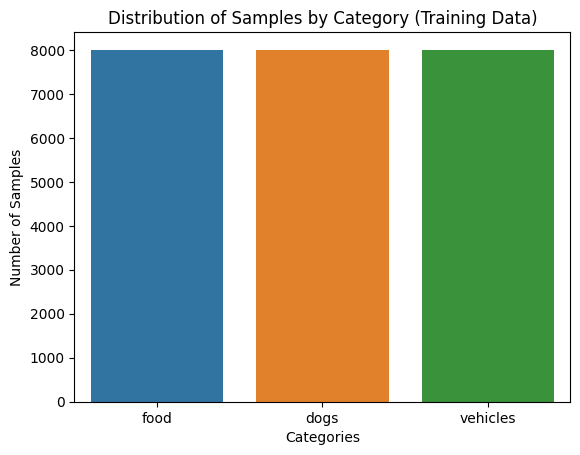

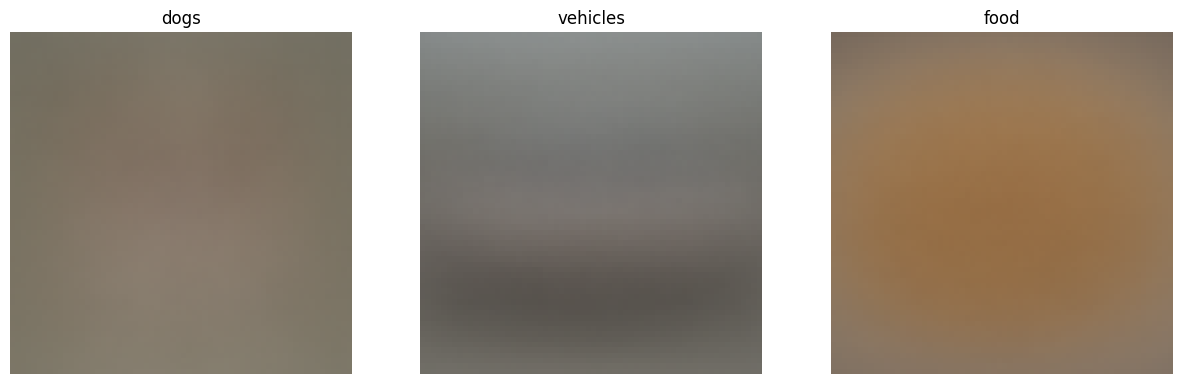

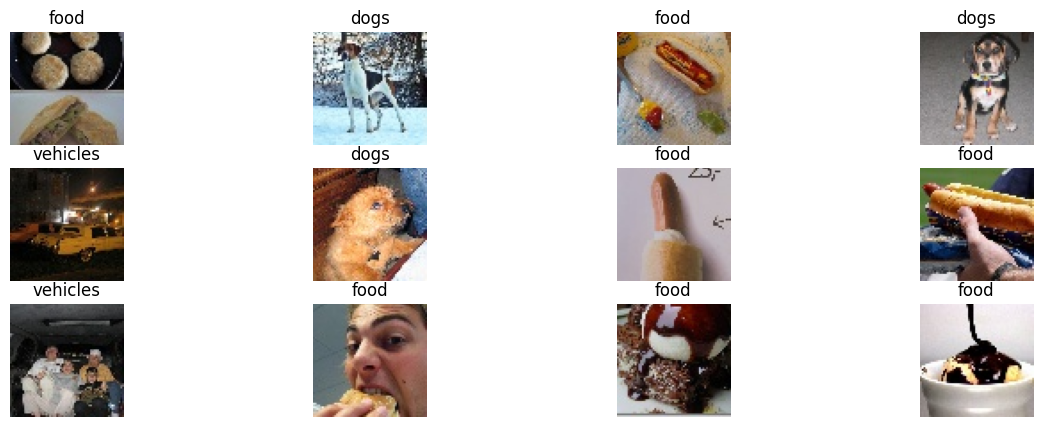

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import seaborn as sns

# Load and preprocess the dataset
import zipfile
import os
import cv2

# Extract the contents of the zip file
zip_file = "/content/drive/MyDrive/Colab Notebooks/cnn_dataset(1).zip"
with zipfile.ZipFile(zip_file, 'r') as z:
    z.extractall("dataset")

def plot_accuracies(train_accuracies, val_accuracies):
    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def plot_examples(images, labels, categories, num_examples=12):
    cat_labels = pd.Series(labels).map(dict(enumerate(categories)))
    fig, axes = plt.subplots(3, num_examples // 3, figsize=(15, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(images[i], np.int32))
        ax.set_title(cat_labels[i])
        ax.axis('off')
    plt.show()

def plot_category_distribution(labels, categories):
    cat_labels = pd.Series(labels).map(dict(enumerate(categories)))
    sns.countplot(x=cat_labels)
    plt.xlabel('Categories')
    plt.ylabel('Number of Samples')
    plt.title('Distribution of Samples by Category (Training Data)')
    plt.show()

def plot_average_images(images, class_indices, categories):
    fig, axes = plt.subplots(1, len(categories), figsize=(15, 5))
    for idx, category in enumerate(categories):
        category_indices = np.where(class_indices == idx)[0]
        avg_image = np.mean(images[category_indices], axis=0)
        avg_image = (avg_image).astype(np.uint8)
        axes[idx].imshow(avg_image)
        axes[idx].set_title(category)
        axes[idx].axis('off')
    plt.show()

# Load images and labels from the extracted files
def load_data(folder_path):
    images = []
    labels = []

    for folder in os.listdir(folder_path):
        folder_path_sub = os.path.join(folder_path, folder)
        if os.path.isdir(folder_path_sub):
            for file in os.listdir(folder_path_sub):
                file_path = os.path.join(folder_path_sub, file)
                if file_path.endswith(".jpg") or file_path.endswith(".png"):
                    # Read and resize the image
                    img = cv2.imread(file_path, 3)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, (64, 64))
                    images.append(img)

                    # Assign a label based on the folder name
                    if folder == "dogs":
                        labels.append(0)
                    elif folder == "vehicles":
                        labels.append(1)
                    elif folder == "food":
                        labels.append(2)

    return np.array(images), np.array(labels)

X, y = load_data("dataset")
print(X.shape , y.shape)
# Resize images to 64x64
X = tf.image.resize(X, (64, 64)).numpy()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
categories = ['dogs', 'vehicles', 'food']
plot_category_distribution(y_train, categories)
plot_average_images(X_train, y_train, categories)
# Normalize pixel values
# X_train = X_train / 255.0
# X_test = X_test / 255.0
plot_examples(X_train, y_train, categories)
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)


In [ ]:
print(tf.__version__)
!python --version

2.12.0
Python 3.10.11


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
import matplotlib.pyplot as plt

# Define the updated AlexNet model

def build_alexnet(input_shape, num_classes):
    model = Sequential([
        Conv2D(filters=96, kernel_size=(5, 5), strides=(2, 2), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        BatchNormalization(),
        Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        BatchNormalization(),
        Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        BatchNormalization(),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    return model



Epoch 1/10
Train loss: 0.3912, Train accuracy: 0.8060, Test loss: 0.2190, Test accuracy: 0.7313
Epoch 2/10
Train loss: 0.1823, Train accuracy: 0.8645, Test loss: 0.3582, Test accuracy: 0.7582
Epoch 3/10
Train loss: 0.1470, Train accuracy: 0.8864, Test loss: 0.2270, Test accuracy: 0.6985
Epoch 4/10
Train loss: 0.2950, Train accuracy: 0.9029, Test loss: 0.1111, Test accuracy: 0.8147
Epoch 5/10
Train loss: 0.1951, Train accuracy: 0.9197, Test loss: 0.1500, Test accuracy: 0.8750
Epoch 6/10
Train loss: 0.1678, Train accuracy: 0.9349, Test loss: 0.1521, Test accuracy: 0.8998
Epoch 7/10
Train loss: 0.1866, Train accuracy: 0.9501, Test loss: 0.0963, Test accuracy: 0.8363
Epoch 8/10
Train loss: 0.3044, Train accuracy: 0.9632, Test loss: 0.2600, Test accuracy: 0.8447
Epoch 9/10
Train loss: 0.1728, Train accuracy: 0.9723, Test loss: 0.2033, Test accuracy: 0.8533
Epoch 10/10
Train loss: 0.0295, Train accuracy: 0.9801, Test loss: 0.0439, Test accuracy: 0.9038


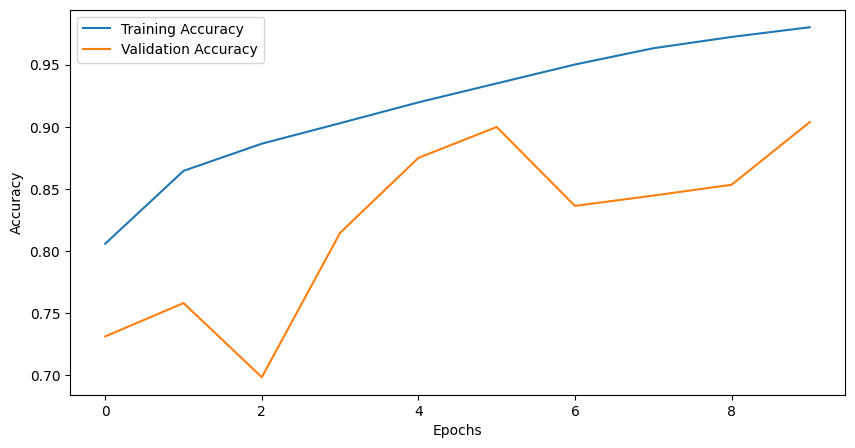

In [ ]:
alexnet = build_alexnet(input_shape, num_classes)

# Define the optimizer, loss function, and metrics
optimizer = SGD()
loss_object = CategoricalCrossentropy()
train_accuracy_object = CategoricalAccuracy()
test_accuracy_object = CategoricalAccuracy()

num_epochs = 10

# Initialize lists to store loss and accuracy values
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

@tf.function
def train_step_base(images, labels):
    with tf.GradientTape() as tape:
        predictions = alexnet(images, training=True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, alexnet.trainable_variables)
    optimizer.apply_gradients(zip(gradients, alexnet.trainable_variables))
    train_accuracy_object.update_state(labels, predictions)
    return loss

@tf.function
def test_step_base(images, labels, accuracy_object):
    predictions = alexnet(images, training=False)
    loss = loss_object(labels, predictions)
    accuracy_object.update_state(labels, predictions)
    return loss

for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')

    # Train the model
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        train_loss = train_step_base(x_batch_train, y_batch_train)

    train_acc = train_accuracy_object.result().numpy()
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validate the model
    for x_batch_test, y_batch_test in test_dataset:
        test_loss = test_step_base(x_batch_test, y_batch_test, test_accuracy_object)

    test_acc = test_accuracy_object.result().numpy()
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f'Train loss: {train_loss:.4f}, Train accuracy: {train_acc:.4f}, Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

    # Reset the metrics
    train_accuracy_object.reset_states()
    test_accuracy_object.reset_states()

plot_accuracies(train_accuracies, test_accuracies)

In [ ]:
def build_updated_alexnet(input_shape, num_classes):
    model = Sequential([
        Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Flatten(),
        Dense(2048, activation='relu'),
        Dropout(0.5),
        Dense(2048, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    return model

Epoch 1
----Train accuracy: 0.7711250185966492


----Test accuracy: 0.7641666531562805
----Validation Loss: 0.574057936668396


Epoch 2
----Train accuracy: 0.8423749804496765
----Test accuracy: 0.7323333621025085
----Validation Loss: 0.659254252910614
Epoch 3
----Train accuracy: 0.8662499785423279


----Test accuracy: 0.797166645526886
----Validation Loss: 0.5193995833396912


Epoch 4
----Train accuracy: 0.8845833539962769


----Test accuracy: 0.8806666731834412
----Validation Loss: 0.49065250158309937


Epoch 5
----Train accuracy: 0.890375018119812
----Test accuracy: 0.8141666650772095
----Validation Loss: 0.4800415337085724
Epoch 6
----Train accuracy: 0.9126666784286499


----Test accuracy: 0.893666684627533
----Validation Loss: 0.2872360050678253


Epoch 7
----Train accuracy: 0.9193333387374878
----Test accuracy: 0.7994999885559082
----Validation Loss: 0.682062029838562
Epoch 8
----Train accuracy: 0.9285416603088379
----Test accuracy: 0.8805000185966492
----Validation Loss: 0.3109448552131653
Epoch 9
----Train accuracy: 0.9291250109672546


----Test accuracy: 0.9168333411216736
----Validation Loss: 0.25880637764930725


Epoch 10
----Train accuracy: 0.9395833611488342
----Test accuracy: 0.9035000205039978
----Validation Loss: 0.2798304557800293
Epoch 11
----Train accuracy: 0.9427499771118164


----Test accuracy: 0.9210000038146973
----Validation Loss: 0.21617506444454193


Epoch 12
----Train accuracy: 0.9496666789054871
----Test accuracy: 0.8991666436195374
----Validation Loss: 0.3089466094970703
Epoch 13
----Train accuracy: 0.9553333520889282
----Test accuracy: 0.9035000205039978
----Validation Loss: 0.382477730512619
Epoch 14
----Train accuracy: 0.9599166512489319
----Test accuracy: 0.9173333048820496
----Validation Loss: 0.22988353669643402
Epoch 15
----Train accuracy: 0.965583324432373
----Test accuracy: 0.7480000257492065
----Validation Loss: 0.8763079643249512
Epoch 16
----Train accuracy: 0.9641666412353516
----Test accuracy: 0.9181666374206543
----Validation Loss: 0.23669064044952393
Epoch 17
----Train accuracy: 0.9737499952316284


----Test accuracy: 0.9369999766349792
----Validation Loss: 0.22795671224594116


Epoch 18
----Train accuracy: 0.9731249809265137
----Test accuracy: 0.9363333582878113
----Validation Loss: 0.25438234210014343
Epoch 19
----Train accuracy: 0.9782500267028809
----Test accuracy: 0.8991666436195374
----Validation Loss: 0.5854981541633606
Epoch 20
----Train accuracy: 0.9791250228881836
----Test accuracy: 0.893833339214325
----Validation Loss: 0.3416547179222107
Epoch 21
----Train accuracy: 0.9832083582878113


----Test accuracy: 0.9390000104904175
----Validation Loss: 0.2740783095359802


Epoch 22
----Train accuracy: 0.9829999804496765


----Test accuracy: 0.9430000185966492
----Validation Loss: 0.2854832112789154


Epoch 23
----Train accuracy: 0.984499990940094
----Test accuracy: 0.9273333549499512
----Validation Loss: 0.3090292811393738
Epoch 24
----Train accuracy: 0.9869166612625122


----Test accuracy: 0.9459999799728394
----Validation Loss: 0.2748032510280609


Epoch 25
----Train accuracy: 0.9837083220481873
----Test accuracy: 0.9388333559036255
----Validation Loss: 0.2742350101470947
Epoch 26
----Train accuracy: 0.9885833263397217


----Test accuracy: 0.9470000267028809
----Validation Loss: 0.2790256142616272


Epoch 27
----Train accuracy: 0.9883333444595337
----Test accuracy: 0.9430000185966492
----Validation Loss: 0.4147474467754364
Epoch 28
----Train accuracy: 0.9902916550636292
----Test accuracy: 0.9458333253860474
----Validation Loss: 0.32811084389686584
Epoch 29
----Train accuracy: 0.9896666407585144
----Test accuracy: 0.9321666955947876
----Validation Loss: 0.6634559035301208
Epoch 30
----Train accuracy: 0.9862499833106995
----Test accuracy: 0.9446666836738586
----Validation Loss: 0.27628087997436523
Epoch 31
----Train accuracy: 0.9925000071525574
----Test accuracy: 0.9346666932106018
----Validation Loss: 0.3772691488265991
Epoch 32
----Train accuracy: 0.9897083044052124
----Test accuracy: 0.8934999704360962
----Validation Loss: 0.4828837811946869
Epoch 33
----Train accuracy: 0.9916666746139526
----Test accuracy: 0.9386666417121887
----Validation Loss: 0.30523332953453064
Epoch 34
----Train accuracy: 0.9879166483879089
----Test accuracy: 0.8529999852180481
----Validation Loss: 1.052528

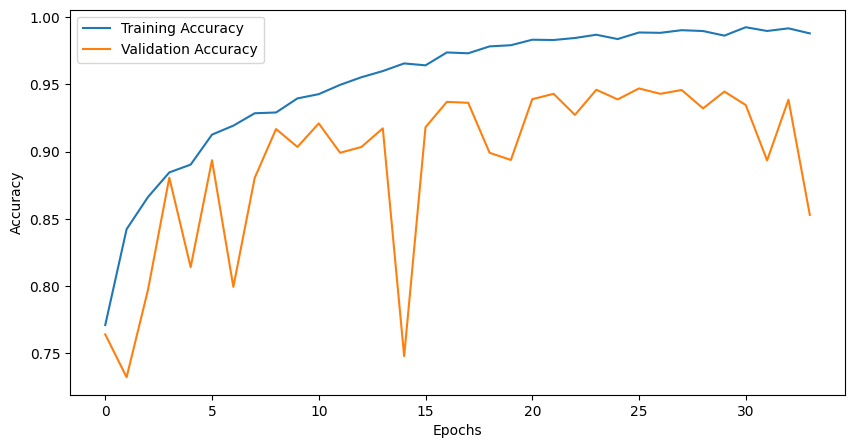

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=6)

input_shape = X_train.shape[1:]
num_classes = 3
model = build_updated_alexnet(input_shape, num_classes)
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.CategoricalCrossentropy()
accuracy_object = tf.keras.metrics.CategoricalAccuracy()

@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    accuracy_object.update_state(labels, predictions)
    return loss

@tf.function
def test_step(images, labels, accuracy_object):
    predictions = model(images, training=False)
    loss = loss_object(labels, predictions)
    accuracy_object.update_state(labels, predictions)
    return loss

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32).shuffle(len(X_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

best_weights_filepath = 'model'

num_epochs = 100
patience = 8
stopped_epoch = 0
best = float('inf')
wait = 0
best_val_accuracy = -1
train_accuracies = []
val_accuracies = []
for epoch in range(num_epochs):
    accuracy_object.reset_states()
    for images, labels in train_dataset:
        train_step(images, labels)

    print(f"Epoch {epoch + 1}\n----Train accuracy: {accuracy_object.result().numpy()}")
    train_accuracies.append(accuracy_object.result().numpy())
    accuracy_object.reset_states()
    test_loss = tf.keras.metrics.Mean()
    for images, labels in test_dataset:
        loss_value = test_step(images, labels, accuracy_object)
        test_loss(loss_value)
    val_accuracies.append(accuracy_object.result().numpy())
    print(f"----Test accuracy: {accuracy_object.result().numpy()}\n----Validation Loss: {test_loss.result()}")

    current = test_loss.result().numpy()
    if accuracy_object.result().numpy() > best_val_accuracy:
      best_val_accuracy = accuracy_object.result().numpy()
      model.save(best_weights_filepath)
      wait = 0
    else:
      wait += 1
      if wait >= patience:
          stopped_epoch = epoch
          break

print(f"Stopped at epoch {stopped_epoch + 1}")
plot_accuracies(train_accuracies, val_accuracies)

In [ ]:
import h5py
import pickle

model.load_weights(best_weights_filepath)
weights = {}
for layer in model.layers:
    weights[layer.name] = layer.get_weights()
with open('best_weights_manual_training.pickle', 'wb') as f:
    pickle.dump(weights, f)
accuracy_object = tf.keras.metrics.CategoricalAccuracy()
test_loss = tf.keras.metrics.Mean()
for images, labels in test_dataset:
    loss_value = test_step(images, labels, accuracy_object)
    test_loss(loss_value)
print("Modified test loss:", test_loss.result().numpy())
print("Modified test accuracy:", accuracy_object.result().numpy())

Modified test loss: 0.23903865
Modified test accuracy: 0.933


In [ ]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

--2023-04-14 02:22:51--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  53.7MB/s    in 4.1s    

2023-04-14 02:22:55 (42.0 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]

--2023-04-14 02:22:55--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  31.0MB/s    in 2.0s    

2023-04-14 02:22:57 (31.0 MB/s) - ‘test_32x32.mat’ saved [64275384/64

(32, 32, 3, 73257)
(32, 32, 3, 73257)


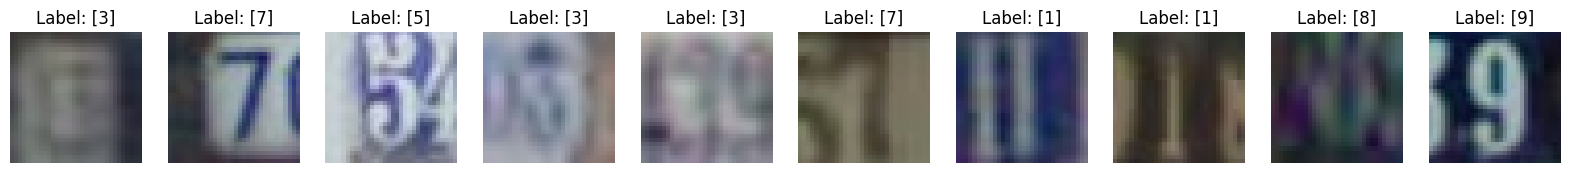

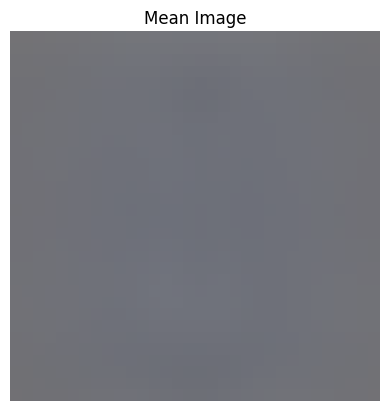

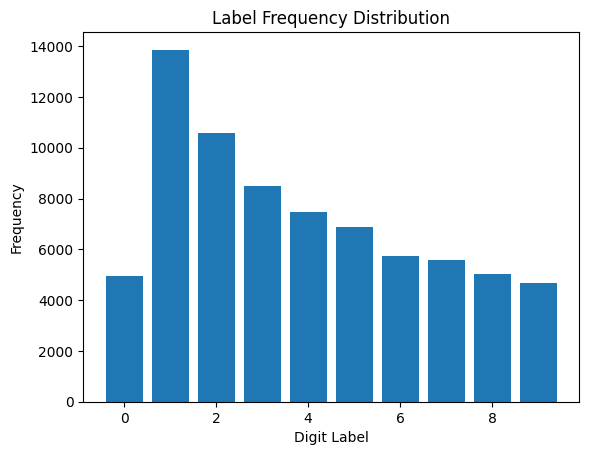

In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

data = scipy.io.loadmat('train_32x32.mat')

# Extract the data from the dictionary
train_images = data['X']
train_labels = data['y']

data = scipy.io.loadmat('train_32x32.mat')
test_images = data['X']

print(train_images.shape)
print(test_images.shape)

# Define the number of images to display
num_images = 10

# Select random images from the dataset
random_indices = np.random.randint(train_images.shape[3], size=num_images)
images_to_display = train_images[:,:,:,random_indices]
labels_to_display = train_labels[random_indices]

# Display the images
fig, axes = plt.subplots(1, num_images, figsize=(20,20))
for i in range(num_images):
    label = labels_to_display[i]
    if (label == 10):
      label = 0
    axes[i].imshow(images_to_display[:,:,:,i])
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')
plt.show()

# Compute the mean image
mean_image = np.mean(train_images, axis=3)

# Compute the frequency of each digit label in the training dataset
label_counts = np.bincount(train_labels.flatten())
label_counts[0] = label_counts[-1]
label_counts = label_counts[:-1]

# Plot the mean image
plt.imshow(mean_image.astype('uint8'))
plt.title("Mean Image")
plt.axis('off')
plt.show()

# Plot the label frequency distribution
fig, ax = plt.subplots()
ax.bar(np.arange(10), label_counts)
ax.set_xlabel('Digit Label')
ax.set_ylabel('Frequency')
ax.set_title('Label Frequency Distribution')
plt.show()

In [ ]:

def build_updated_alexnet(input_shape, num_classes):
    model = Sequential([
        Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Flatten(),
        Dense(2048, activation='relu'),
        Dropout(0.5),
        Dense(2048, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    return model

Epoch 1, Loss: 1.16886568069458, Accuracy: 0.617559552192688, Val Loss: 0.7334685921669006, Val Accuracy: 0.7745466828346252
Epoch 2, Loss: 0.5589723587036133, Accuracy: 0.8369921445846558, Val Loss: 1.3585880994796753, Val Accuracy: 0.5432160496711731
Epoch 3, Loss: 0.4554590582847595, Accuracy: 0.870071530342102, Val Loss: 0.3725399971008301, Val Accuracy: 0.8934004306793213
Epoch 4, Loss: 0.3994715213775635, Accuracy: 0.8879559636116028, Val Loss: 0.33633527159690857, Val Accuracy: 0.9032728672027588
Epoch 5, Loss: 0.372410386800766, Accuracy: 0.8947001695632935, Val Loss: 0.5494981408119202, Val Accuracy: 0.8351259827613831
Epoch 6, Loss: 0.3600868284702301, Accuracy: 0.8992327451705933, Val Loss: 0.26304319500923157, Val Accuracy: 0.9278196096420288
Epoch 7, Loss: 0.33771416544914246, Accuracy: 0.9051578044891357, Val Loss: 0.24922671914100647, Val Accuracy: 0.9302396774291992
Epoch 8, Loss: 0.3259196877479553, Accuracy: 0.9082432389259338, Val Loss: 0.297745019197464, Val Accurac

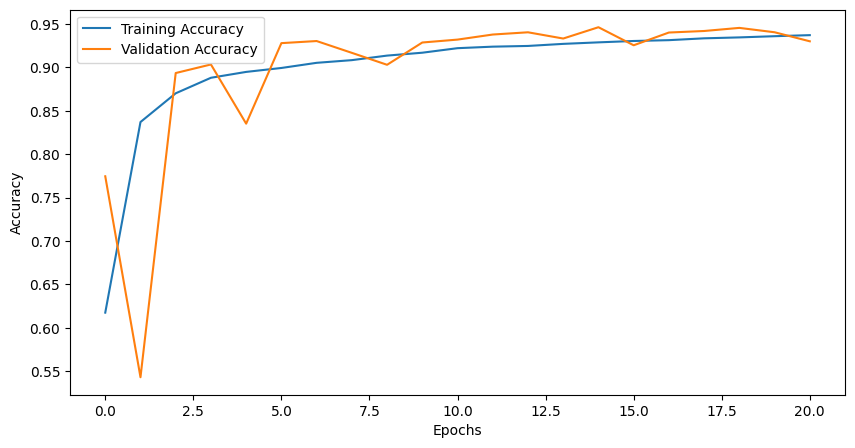

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy.io
import matplotlib.pyplot as plt

@tf.function
def train_step_svhn(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    train_loss(loss)
    train_accuracy(labels, predictions)

@tf.function
def val_step_svhn(images, labels):
    predictions = model(images, training=False)
    loss = loss_object(labels, predictions)
    val_loss(loss)
    val_accuracy(labels, predictions)

def load_svhn_data(train_file, test_file):
    train_data = scipy.io.loadmat(train_file)
    test_data = scipy.io.loadmat(test_file)

    X_train, y_train = train_data['X'], train_data['y']
    X_test, y_test = test_data['X'], test_data['y']

    # Transpose the data to be in the format (num_samples, height, width, channels)
    X_train = X_train.transpose((3, 0, 1, 2))
    X_test = X_test.transpose((3, 0, 1, 2))

    # Change the label range from [1, 10] to [0, 9]
    y_train = y_train % 10
    y_test = y_test % 10

    return (X_train, y_train), (X_test, y_test)
# Load the SVHN dataset
(X_train, y_train), (X_test, y_test) = load_svhn_data('train_32x32.mat', 'test_32x32.mat')

# Preprocess the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
num_classes = 10
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

datagen.fit(X_train) # generating data

model = build_updated_alexnet(X_train.shape[1:], num_classes)

epochs = 50
patience = 6
stopped_epoch = 0
wait = 0
best_val_accuracy = -1
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
train_loss = tf.keras.metrics.Mean()
train_accuracy = tf.keras.metrics.CategoricalAccuracy()
val_loss = tf.keras.metrics.Mean()
val_accuracy = tf.keras.metrics.CategoricalAccuracy()
best_weights_filepath = 'best_weights_google.h5'
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    train_loss.reset_states()
    train_accuracy.reset_states()
    val_loss.reset_states()
    val_accuracy.reset_states()

    # Use augmented data for training
    train_batches = 0
    for images, labels in datagen.flow(X_train, y_train, batch_size=32):
        train_step_svhn(images, labels)
        train_batches += 1
        if train_batches >= len(X_train) // 32:
            break

    for images, labels in test_dataset:
        val_step_svhn(images, labels)

    train_accuracies.append(train_accuracy.result().numpy())
    val_accuracies.append(val_accuracy.result().numpy())
    print(f"Epoch {epoch + 1}, Loss: {train_loss.result()}, Accuracy: {train_accuracy.result()}, Val Loss: {val_loss.result()}, Val Accuracy: {val_accuracy.result()}")

    if val_accuracy.result() > best_val_accuracy:
        model.save_weights(best_weights_filepath)
        best_val_accuracy = val_accuracy.result()
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            stopped_epoch = epoch
            break

print("Training stopped at epoch", stopped_epoch + 1)
plot_accuracies(train_accuracies, val_accuracies)



In [ ]:
import h5py
import pickle
model.load_weights(best_weights_filepath)
weights = {}
for layer in model.layers:
    weights[layer.name] = layer.get_weights()
with open('best_weights_svhn.pickle', 'wb') as f:
    pickle.dump(weights, f)
val_accuracy.reset_states()
for images, labels in test_dataset:
    val_step_svhn(images, labels)

print(f"Test accuracy: {val_accuracy.result().numpy()}")

Test accuracy: 0.9461432099342346
